# Importing Library

In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Loading Data

In [19]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
main_directory1  = '/content/gdrive/MyDrive/Pattern Lab/Assignment3/train_knn.txt'
main_directory2  = '/content/gdrive/MyDrive/Pattern Lab/Assignment3/test_knn.txt'

train = pd.read_csv(main_directory1, sep=',' , header = None)
test = pd.read_csv(main_directory2, sep=',' , header = None)

In [21]:
print(train)

    0  1  2
0   7  7  1
1   7  4  1
2   6  4  1
3   7  5  1
4   7  6  1
5   6  7  1
6   6  6  1
7   3  4  2
8   2  3  2
9   3  2  2
10  4  3  2
11  3  3  2
12  4  4  2
13  1  4  2


In [22]:
print(test)

   0  1
0  3  7
1  7  7
2  4  3
3  2  8
4  3  5
5  1  2
6  4  8
7  8  3
8  8  4


# Dividing Into Classes

In [23]:
class_1 = train[train[2]==1]
class_1

,0,1,2
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1


In [24]:
class_2 = train[train[2]==2]
class_2

,0,1,2
7,3,4,2
8,2,3,2
9,3,2,2
10,4,3,2
11,3,3,2
12,4,4,2
13,1,4,2


# Plotting Graph

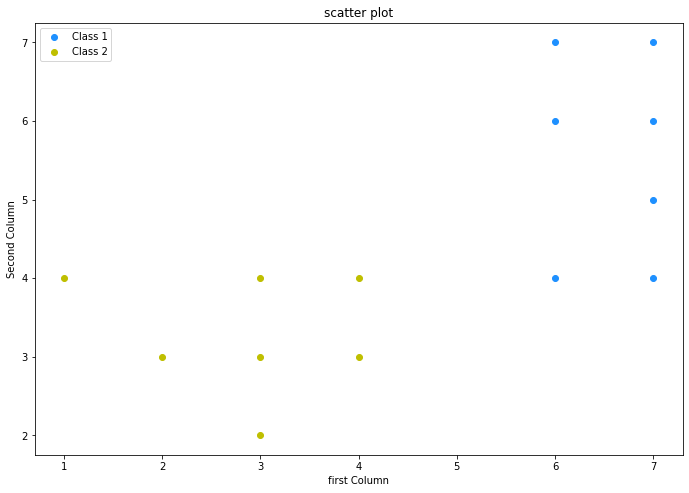

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1.5,1.5])
ax.scatter(class_1[0], class_1[1], color='dodgerblue', label="Class 1")
ax.scatter(class_2[0], class_2[1] , color='y', label="Class 2")
ax.set_xlabel('first Column')
ax.set_ylabel('Second Column')
ax.set_title('scatter plot')
plt.legend(loc="upper left")
plt.show()

# Defining BubbleSort Function

In [26]:
def bubbleSort(array, target_label):
    for i in range(len(array)):
        for j in range(0, len(array) - i - 1):
            if array[j] > array[j + 1]:
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp

                temp = target_label[j]
                target_label[j] = target_label[j+1]
                target_label[j+1] = temp
    return array

In [27]:
def calculate_dist(x,y):
    global train    
    dist = []
    target_label = list(train[2])
    for i,j in zip(train[0], train[1]):
        dist.append(((i-x)**2 +(j-y)**2))        
    dist = bubbleSort(dist,target_label)
    return dist,target_label

In [28]:
distances = []
target_labels = []
for i,j in zip(test[0], test[1]):
    a, b = calculate_dist(i,j)
    distances.append(a)
    target_labels.append(b)

In [29]:
distances = np.array(distances)
distances.shape

(9, 14)

In [30]:
target_labels = np.array(target_labels)
target_labels.shape

(9, 14)

In [31]:
test = np.array(test)

# Taking User Input

In [32]:
k=input ("Enter value of k :")
k=int(k)
type(k)

Enter value of k :3


int

# KNN Algorithm

In [33]:
output = []
predicted_class_1 = []
predicted_class_2 = []
prediction_text = []
for i in range(len(test)):
    count_1, count_2 = 0, 0
    print('Test Point: ', test[i])
    s = 'Test Point: '+ str(test[i]) + '\n'
    prediction_text.append(s)
    for j in range(k):
        print('Distance : ', distances[i][j], 'Class : ', target_labels[i][j])
        s = 'Distance : '+ str(distances[i][j])  + '   Class : ' + str(target_labels[i][j]) + '\n'
        prediction_text.append(s)
        if target_labels[i][j] == 1:
            count_1 += 1
        else:
            count_2 += 1    
    if count_1 > count_2:
        print('Predicted Class 1')
        prediction_text.append('Predicted Class 1' + '\n\n')
        predicted_class_1.append(list(test[i]))
    else:
        print('Predicted Class 2')
        prediction_text.append('Predicted Class 2' + '\n\n')
        predicted_class_2.append(list(test[i]))
    print('\n\n')

Test Point:  [3 7]
Distance :  9 Class :  1
Distance :  9 Class :  2
Distance :  10 Class :  1
Predicted Class 1



Test Point:  [7 7]
Distance :  0 Class :  1
Distance :  1 Class :  1
Distance :  1 Class :  1
Predicted Class 1



Test Point:  [4 3]
Distance :  0 Class :  2
Distance :  1 Class :  2
Distance :  1 Class :  2
Predicted Class 2



Test Point:  [2 8]
Distance :  17 Class :  1
Distance :  17 Class :  2
Distance :  17 Class :  2
Predicted Class 2



Test Point:  [3 5]
Distance :  1 Class :  2
Distance :  2 Class :  2
Distance :  4 Class :  2
Predicted Class 2



Test Point:  [1 2]
Distance :  2 Class :  2
Distance :  4 Class :  2
Distance :  4 Class :  2
Predicted Class 2



Test Point:  [4 8]
Distance :  5 Class :  1
Distance :  8 Class :  1
Distance :  10 Class :  1
Predicted Class 1



Test Point:  [8 3]
Distance :  2 Class :  1
Distance :  5 Class :  1
Distance :  5 Class :  1
Predicted Class 1



Test Point:  [8 4]
Distance :  1 Class :  1
Distance :  2 Class :  1
Distan

In [34]:
with open('prediction.txt', 'w') as writefile:
    for line in prediction_text:
        writefile.write(line)

In [35]:
df1 = pd.DataFrame(predicted_class_1, columns = [0,1])
df2 = pd.DataFrame(predicted_class_2, columns = [0,1])

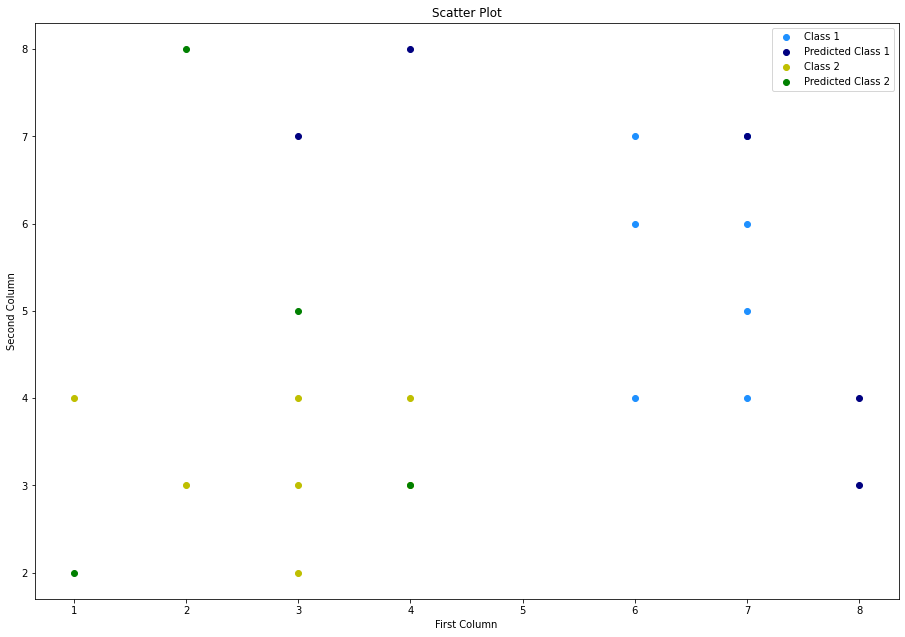

In [36]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.scatter(class_1[0], class_1[1], color='dodgerblue', label="Class 1")
ax.scatter(df1[0], df1[1], color='navy', label="Predicted Class 1")
ax.scatter(class_2[0], class_2[1] , color='y', label="Class 2")
ax.scatter(df2[0], df2[1] , color='g', label="Predicted Class 2")
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_title('Scatter Plot')
plt.legend(loc="upper right")
plt.show()